<a href="https://colab.research.google.com/github/california-19/Classifying_News_Articles/blob/main/Classifying_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import webhoseio
import datetime as dt
import pandas as pd

In [ ]:
# You have to write your own key here.
my_key = my_key

In [ ]:
webhoseio.config(token=my_key)

In [ ]:
# The code assumes that there is an existing output file with prior search results.
# If it is your first time running, create an output file with columns 'text', 'site' and 'key_words'
output = pd.read_csv('output.csv')

In [ ]:
output

,text,site,key_words
0,(CNN) Connecticut officials are expressing the...,cnn.com,atlanta shooting
1,(CNN) The horror began in the parking lot.\nA ...,cnn.com,atlanta shooting
2,New York (CNN Business) After mass shootings i...,cnn.com,atlanta shooting
3,10 killed in Colorado grocery store shooting B...,cnn.com,atlanta shooting
4,(CNN) Golden State Warriors head coach Steve K...,cnn.com,atlanta shooting
5,(CNN) — Rep. Jason Crow is urging Congress to ...,cnn.com,atlanta shooting
6,(CNN) — Democratic voters in Georgia may have ...,cnn.com,atlanta shooting
7,(CNN) The White House is weighing whether to i...,cnn.com,atlanta shooting
8,(CNN) A man armed with a rifle entered an Atla...,cnn.com,atlanta shooting
9,Jess Huang is a communications specialist who ...,cnn.com,atlanta shooting


In [ ]:
def fetch_data(q, site):
    query_params_ = {
        "q": q,
        "sort": "crawled",
        "site_type": "news",
        "site": site
    }
    # We query the data here
    new_output = webhoseio.query("filterWebContent", query_params_)
    
    # We turn the json file into a dataframe
    new_output = pd.json_normalize(new_output['posts'])
    
    # We pick up the columns we want and ignore the rest
    col_list = ['text', 'thread.site']
    new_output = new_output[col_list]
    
    # We should simplify the column names
    new_output.rename(columns={'thread.site':'site'}, inplace=True)
    
    # We add the key words as a column
    new_output['key_words'] = q

    # We merge with the original dataframe
    df = pd.concat([new_output, output], ignore_index=True)
    return df

In [ ]:
df = fetch_data('atlanta shooting', 'cnn.com')
df

Exception: Your 10-day trial has now ended. 

If you'd like to continue using Webhose, please visit our pricing plan. https://webhose.io/plans-and-pricing

There are duplicates in the results. We have to remove duplicates.

Let's work on foxnews now.

<AxesSubplot:>

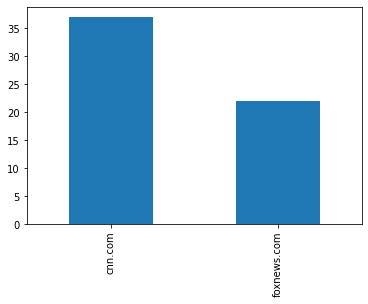

In [ ]:
#Let's look at our news source count
df.site.value_counts().plot(kind='bar')

# Text Preprocessing
We will process the text. We start with removing duplicates. First, we will define a function to determine similarity. Then, using this similarity ratio we will elilminate the duplicate rows.

In [ ]:
import difflib
# This function is to find similar entries and eliminate them.
def similar(a, b):
    return difflib.SequenceMatcher(None, a, b).ratio()

In [ ]:
df = output
df.shape

(59, 3)

In [ ]:
df.shape

(59, 3)

In [ ]:
# This function is to remove any rows with similar text. Duplicate remover function does not work
# since we are working with large text and a similarity finder works properly

def duplicate_remover(df):
    
    df.reset_index(inplace=True, drop=True)               # we reset the index since the whole fn depends on index
    my_list = []                                          # my_list will be where similar rows will be stored
    for index, row in df.iterrows():                      # we iterate over the rows twice
        for index2, row2 in df.iterrows():
            if index != index2:                           # we avoid comparing the text with itself
                k = similar(row['text'], row2['text'])    # we use the similarity function we defined before
                if k > .7:                                # if the similarity is more than 70%, we drop one of the news
                    r1 = min(index, index2)
                    r2 = max(index, index2)
                    if (r1, r2) not in my_list:           # every similar row is entered as an ordered tuple
                        my_list.append((r1, r2))          # we add similar tuples to our list

    new_list = []                                         # we choose one of the similar rows
    for i in my_list:
        new_list.append(i[1])


    for i in new_list:
        df = df.drop(df.loc[df.index==i].index)
        #df.drop([i], inplace=True)                        # we drop one of the similar news
    return df

In [ ]:
df = duplicate_remover(df)

In [ ]:
# We would like to save the output to a file, to be used later
df.reset_index(inplace=True, drop=True)
df.to_csv('output.csv', index=False)
df

,text,site,key_words
0,(CNN) Connecticut officials are expressing the...,cnn.com,atlanta shooting
1,(CNN) The horror began in the parking lot.\nA ...,cnn.com,atlanta shooting
2,New York (CNN Business) After mass shootings i...,cnn.com,atlanta shooting
3,10 killed in Colorado grocery store shooting B...,cnn.com,atlanta shooting
4,(CNN) Golden State Warriors head coach Steve K...,cnn.com,atlanta shooting
5,(CNN) — Rep. Jason Crow is urging Congress to ...,cnn.com,atlanta shooting
6,(CNN) — Democratic voters in Georgia may have ...,cnn.com,atlanta shooting
7,(CNN) The White House is weighing whether to i...,cnn.com,atlanta shooting
8,(CNN) A man armed with a rifle entered an Atla...,cnn.com,atlanta shooting
9,Jess Huang is a communications specialist who ...,cnn.com,atlanta shooting


# Machine Learning Starts from Here

In [ ]:
import logging
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

/Users/sck/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sck/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = output

### We define a function to clean the data
A single function will do all the work for us. We also want to remove words like 'cnn', 'fox' or 'foxnews' since they will skew the results

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = text.replace('cnn', '')
    text = text.replace('fox', '')
    text = text.replace('foxnews', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text

In [ ]:
# The column name that contains the articles is 'text'. We apply our cleaning function onto this column.
df['text'] = df['text'].apply(clean_text)
print(df['text'][0])

In [ ]:
z = 53
print(df['site'][z])
print(df['text'][z])

# Training the Model

## Naive Bayes Classifier for Multinomial Models
Multinomial is for models where there are more than two classes. Though, in our current case there are only two classes, Fox News and CNN, the model is general to work on multi classes too.

In Naive Bayes classification, we calculate the prior probabilities with finding the probability of seeing a word in a certain class, given the number of times that word appears in that class. We do this for every class. These are also called likelihoods. Then we compute the posterior probabilities of each entries and classify according to this.

### Pros and Cons
The main feature of Naive Bayes classification is that it assumes that all features, like words, are independent. This is not a realistic assumption in our case since words are not independent from each other. But it is a very speedy classification method.

In [ ]:
col_list = list(df['site'].unique())

In [ ]:
df = df.sample(frac = 1)
X = df.text
y = df.site
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
type(X_test)

pandas.core.series.Series

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [ ]:
%%time
from sklearn.metrics import classification_report
Y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred,target_names=col_list))

accuracy 0.6111111111111112
              precision    recall  f1-score   support

     cnn.com       0.61      1.00      0.76        11
 foxnews.com       0.00      0.00      0.00         7

    accuracy                           0.61        18
   macro avg       0.31      0.50      0.38        18
weighted avg       0.37      0.61      0.46        18

CPU times: user 27.5 ms, sys: 6.83 ms, total: 34.3 ms
Wall time: 72.5 ms


/Users/sck/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We achieved 61% accuracy which is too good I think.

## Linear Support Vector Machine

SVM uses vectors to draw decision boundries between vectors. This means that the text has to be vectorized to be used with a SVM.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [ ]:
%%time

Y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred,target_names=col_list))

accuracy 0.7222222222222222
              precision    recall  f1-score   support

     cnn.com       0.75      0.82      0.78        11
 foxnews.com       0.67      0.57      0.62         7

    accuracy                           0.72        18
   macro avg       0.71      0.69      0.70        18
weighted avg       0.72      0.72      0.72        18

CPU times: user 18.1 ms, sys: 1.91 ms, total: 20 ms
Wall time: 25.3 ms


The accuracy is 72%, which is better.

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, Y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [ ]:
%%time

Y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(Y_pred, Y_test))
print(classification_report(Y_test, Y_pred,target_names=col_list))

accuracy 0.7777777777777778
              precision    recall  f1-score   support

     cnn.com       0.82      0.82      0.82        11
 foxnews.com       0.71      0.71      0.71         7

    accuracy                           0.78        18
   macro avg       0.77      0.77      0.77        18
weighted avg       0.78      0.78      0.78        18

CPU times: user 22.7 ms, sys: 2.78 ms, total: 25.5 ms
Wall time: 32.3 ms


77% accuracy which is even better

## With Python Deep Learning Library Keras

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from sklearn.preprocessing import LabelEncoder
from keras import utils
from keras.backend import clear_session

# This line shuffles the rows
df = df.sample(frac = 1)

train_size = int(len(df) * .8)
train_text = df['text'][:train_size]
train_site = df['site'][:train_size]

test_text = df['text'][train_size:]
test_site = df['site'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_text) # only fit on train

x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

encoder = LabelEncoder()
encoder.fit(train_site)
y_train = encoder.transform(train_site)
y_test = encoder.transform(test_site)


num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 10
epochs = 100

clear_session()

# The model
model = Sequential()
model.add(Dense(10, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

#score = model.evaluate(x_test, y_test,
#                       batch_size=batch_size, verbose=1)

loss, accuracy = model.evaluate(x_train, y_train, batch_size=batch_size, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/100
5/5 [==============================] - 1s 98ms/step - loss: 0.8955 - accuracy: 0.5097 - val_loss: 0.7022 - val_accuracy: 0.6000
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.6684 - accuracy: 0.5956 - val_loss: 0.5443 - val_accuracy: 0.6000
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5166 - accuracy: 0.7558 - val_loss: 0.4816 - val_accuracy: 0.8000
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.5403 - accuracy: 0.6522 - val_loss: 0.4535 - val_accuracy: 0.8000
Epoch 5/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4509 - accuracy: 0.8171 - val_loss: 0.4561 - val_accuracy: 0.8000
Epoch 6/100
5/5 [==============================] - 0s 18ms/step - loss: 0.4590 - accuracy: 0.7647 - val_loss: 0.4617 - val_accuracy: 0.8000
Epoch 7/100
5/5 [==============================] - 0s 19ms/step - loss: 0.4258 - accuracy: 0.8347 - val_loss: 0.4445 - val_accuracy: 0.8000
Epoch 8/100
5/5 [===

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

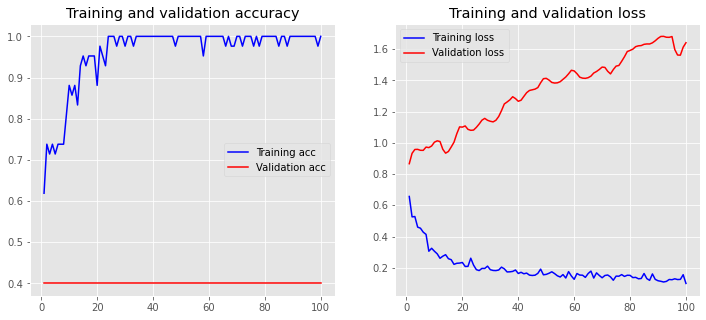

In [ ]:
plot_history(history)

My training accuracy reaches 100% after a bit more than 20 rounds. Validation accuracy is constant at .4, due to the distribution of my labels. I have only two labels in this model.

I definetely need to increase my training set. I run my API for one day only, before my free access expired. My validation accuracy is a sign of overfitting.

# Conclusion
It is interesting to predict from which news source an article is coming from. People are talking about news sources being biased but letting the machines figure this out is interesting.

Although the model can predict the source of an article, we cannot say something about why these news articles are different. There can be different reasons for this. For example, writers of these websites are the same which means that the differences can be due to writers' personal style rather than political inclinations. At the end, we all have a different style of writing. But, it is unlikely that all articles from each of these sources are written by the same person. Therefore, it does give us an idea about other reasons why these articles are classified differently.